In [1]:
library(dplyr)
library(arrow)
library(sportyR)
library(ggplot2)
library(xml2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘arrow’

The following object is masked from ‘package:utils’:

    timestamp



In [2]:
frames <- read_parquet("/home/lz80/rdf/sp161/shared/soccer-decision-making-r/sportec/passes.parquet")


In [51]:
test_event <- frames |> select(event_id) |> pull() |> first()
t_play <- frames |> filter(event_id == test_event)

In [30]:
library(xml2)

build_player_map <- function(path) {
  doc <- read_xml(path)
  
  teams <- xml_find_all(doc, ".//Team")
  
  data <- list()
  
  for (team in teams) {
    team_id <- xml_attr(team, "TeamId")
    players <- xml_find_all(team, ".//Player")
    
    for (player in players) {
      person_id <- xml_attr(player, "PersonId")
      data[[person_id]] <- team_id
    }
  }
  data$BALL <- "BALL"
  
  return(data)
}


In [53]:
match = t_play |> select(match_id) |> first()
player_map = unlist(build_player_map(paste0("/home/lz80/rdf/sp161/shared/soccer-decision-making-r/sportec/match_information/", match)))

In [54]:
t_play <- t_play |> mutate(
  team = player_map[object_id]
)

In [55]:
t_play

# A tibble: 23 × 47
   event_id event_type period_id timestamp  end_timestamp ball_state
    <int64> <chr>          <int> <drtn>             <???> <chr>     
 1    1.e13 PASS               1 2.438 secs             . alive     
 2    1.e13 PASS               1 2.438 secs             . alive     
 3    1.e13 PASS               1 2.438 secs             . alive     
 4    1.e13 PASS               1 2.438 secs             . alive     
 5    1.e13 PASS               1 2.438 secs             . alive     
 6    1.e13 PASS               1 2.438 secs             . alive     
 7    1.e13 PASS               1 2.438 secs             . alive     
 8    1.e13 PASS               1 2.438 secs             . alive     
 9    1.e13 PASS               1 2.438 secs             . alive     
10    1.e13 PASS               1 2.438 secs             . alive     
# ℹ 13 more rows
# ℹ 41 more variables: ball_owning_team <???>, team_id <chr>, player_id <chr>,
#   coordinates_x <dbl>, coordinates_y <dbl>, end_coordi

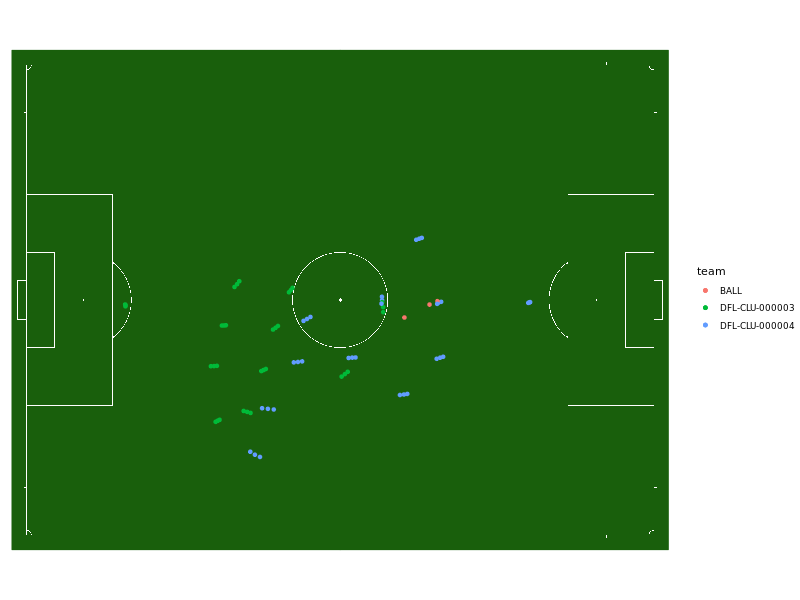

In [ ]:
geom_soccer(league = "EPL") + geom_point(data = t_play, aes(x = x, y = y, col = team)) + geom_point(data = t_play, aes(x = x_m5, y = y_m5, col = team)) + geom_point(data = t_play, aes(x = x_p5, y = y_p5, col = team))
#rough plot: current position, position 5 frames back, 5 frames forward